# Notebook taken from the [FAST AI COURSE](https://course.fast.ai/)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

bs = 16
path = untar_data(URLs.PETS);
path_anno = path/'annotations'
path_img = path/'images'
fnames = get_image_files(path_img)

In [3]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [4]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

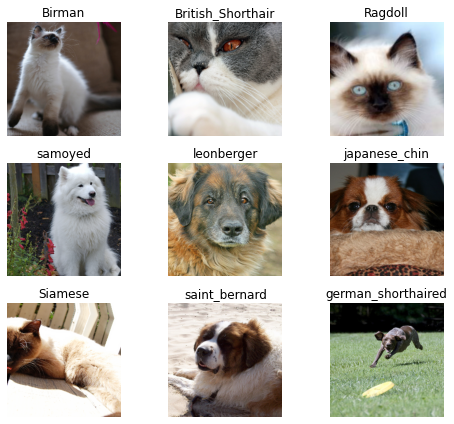

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.914285,0.407085,0.127876,00:58
1,0.733035,0.347093,0.106901,00:57
2,0.513620,0.265015,0.071719,00:57
3,0.371667,0.239612,0.065629,00:57


In [9]:
learn.save('stage-1')

In [10]:
learn.export('/opt/notebooks/export.pkl')